In [1]:
from sklearn.ensemble import GradientBoostingRegressor

import pandas as pd
import numpy as np
import vset, bounds
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

from dgp import *
import estimation, utils, experiments, plots, realdata, plots, os


In [ ]:
data = realdata.get_screening_dgp(fname='data/obermeyer.csv', n_screen_out=2000)

dgp = {
    'N': 10000,
    'Dx': data['XU'].shape[1],
    'Du': 0,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'lambda': 2,
    'model': 'LR'
}

lambdas = np.arange(1, 2.6, .1)
data = realdata.get_screening_dgp(fname='data/obermeyer.csv', n_screen_out=2000)
estimation.sample_split_crossfit(dgp, data, id_method='MSM', est_method='plugin', K=5)
brdf = experiments.design_sensitivity_exp(dgp, data, lambdas, n_sims=10)
plots.plot_design_sensitivity(brdf)


## Utility ratio curve

/Users/lguerdan/.virtualenvs/10701-Project/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


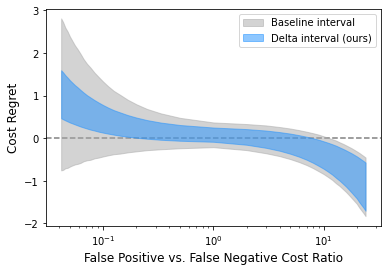

In [12]:
data = realdata.get_screening_dgp(fname='data/obermeyer.csv', n_screen_out=2000)

nD =  data['XU'].shape[1]
dgp = {
    'Dx': nD,
    'nz':1,
    'lambda': 1.7,
    'model': 'GB'
}

crdf = experiments.cost_ratio_sweep_exp(dgp, data, lam=1.7)
plots.plot_cost_ratio_curve(dgp, crdf, 'results/ratio_curve_df.pdf')

# crdf = pd.read_csv('results/ratio_curve_df_L17_GB_20R.csv')
# plots.plot_cost_ratio_curve(dgp, crdf, 'results/ratio_curve_df.pdf')


## Evaluating the subgroup regret

In [ ]:
n_screen_out = 2000
data = realdata.get_screening_dgp(fname='data/obermeyer.csv', n_screen_out=n_screen_out)

dgp = {
    'Dx': data['XU'].shape[1],
    'nz': 1,
    'lambda': 1.2,
    'model': 'GB'
}

gbdf = realdata.subgroup_exp(data, dgp, n_sims=20, K=2, n_screen_out=n_screen_out)
# gbdf.to_csv('results/subgroup_exp_df.csv', index=False)
plots.plot_subgroup_basic(gbdf, metric='m_a=0', fname='figs/subgroup_regret.pdf')

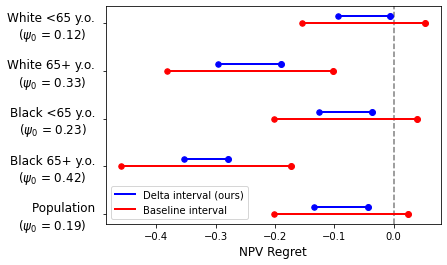

In [7]:
gbdf = pd.read_csv('results/subgroup_exp_df.csv')
plot_subgroup_basic(gbdf, metric='m_a=0', fname='figs/subgroup_regret.pdf')

In [6]:
gbdf[gbdf['metric'] == 'm_a=0'].groupby(['g']).mean()

,s,Rs_down,Rs_up,Rd_down,Rd_up,Rs_coverage,Rd_coverage,R_oracle,selection_rate,size
g,,,,,,,,,,
_Population,9.5,-0.201612,0.024550,-0.134021,-0.043041,1.000,0.725,-0.101163,0.185423,1.000000
x_black_65+ y.o.,9.5,-0.459440,-0.172374,-0.352580,-0.279234,0.025,0.000,-0.025888,0.419079,0.034098
x_black_<65 y.o.,9.5,-0.201269,0.039474,-0.124951,-0.036844,0.925,0.400,-0.111041,0.229300,0.083767
x_white_65+ y.o.,9.5,-0.382533,-0.102529,-0.295274,-0.189788,0.500,0.050,-0.098446,0.330227,0.220285
x_white_<65 y.o.,9.5,-0.154167,0.053680,-0.093932,-0.006555,0.875,0.600,-0.079472,0.119594,0.661850
